<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/hw_0529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[과제 _ 개념정리]**

**범위 : 파이썬 머신러닝 완벽가이드 ch6. 1 ~ 3 pg. 377 ~ 395**


---

# Chapter 06 . 차원 축소 

## 01. 차원 축소의 개요

차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다.
* 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소한 구조를 가지게 됨 
* 수백개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐 
* 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능 성이 크고, 상관관계가 높을 경우 다중 공선성 문제가 생길수도 있음

=> 차원 축소를 할 경우 시각적으로 데이터를 압축해서 표현할 수 있으며, 학습 데이터의 크기가 줄어들어 학습에 필요한 처리 능력도 줄일 수 있음

<피처선택 / 피처 추출>
* 피처 선택 
  * 특성 선택은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다. 
  * 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것으로, 기존의 피처와는 완전히 다른 값이 된다.
* 피처 추출 
 * 기존 피처를 단순 압축이 아닌 피처를 함축적으로 더 잘 설명할 수 있는 또 다들 공간으로 매핑해 추출하는 것이다. 
 * 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소를 추출하는 것을 의미한다.

## 02. PCA

### 1) PCA 개요 

여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법

* PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다. 이를 위해서는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주 성분이 된다.

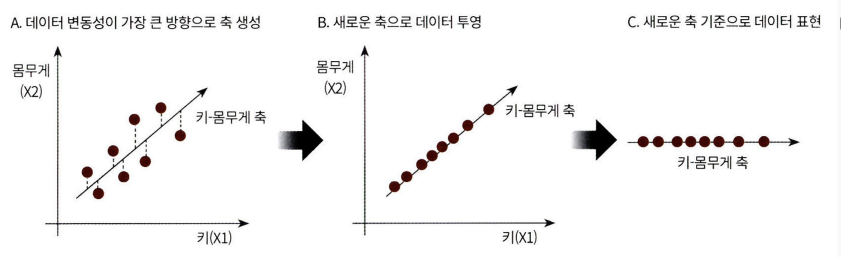

* 먼저, 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성 
* 두번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 
* 세번째 축은 다시 두번째 축과 직각이 되는 벡터를 설정하는 방식으로 
* 백터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.

(1) PCA를 선형대수 관점에서 해석해보면 

  입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 것이다. 

* 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.
* 고유값은 바로 이 고유 벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.

<고유 벡터>
* 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭한다. 
* 고유벡터는 여러개가 존재하며, 정방 행렬은 최대 그 차원의 수만큼 고유벡터를 가질 수 있다.

<공분산 행렬>
* 정방행렬이며 대칭행렬이다. 
* 공분산행렬은 개별 분산 값을 대각 원소로 하는 대칭행렬이다. 이 대칭행렬은 항상 고유벡터를 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있다,
* 입력 데이터의 공분산 행렬을 C라고 하면, 공분산 행렬의 특성으로 아래와 같이 분해할 수 있다. P는 nxn의 직교행렬이며, 기호는 nxn의 정방행렬이다.

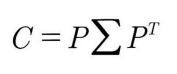

=> 정리하면, 입력데이터의 공분산행렬이 고유벡터와 고유값으로 분해될 수 있으며, 일허게 분해된 고유 벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA이다.

(2) PCA 단계 
 1. 입력 데이터 세트의 공분산 행렬을 생성한다. 
 2. 공분산 행렬의 고유벡터와 고유값을 계산한다. 
 3. 고유값이가장 큰 순으로 K(PCA 변환 차수만큼)개 만큼 고유벡터를 추출한다.
 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

**<붓꽃 data>**

* 데이터 불러오기

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


* 각 품종에 따라 원본 붓꽃 데이터 세트의 분포 2차원으로 시각화

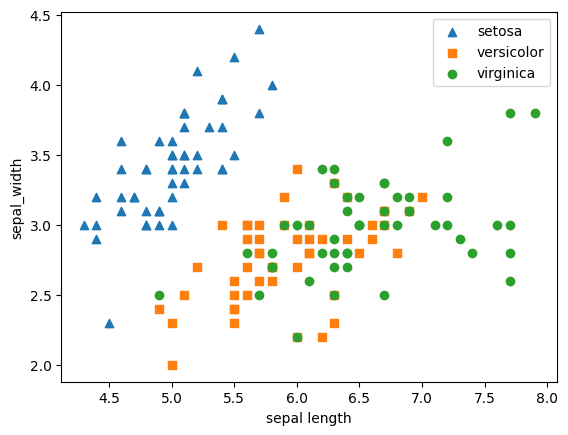

In [2]:
#setosa는 세모, versicolor은 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal_width')
plt.show()

=> setosa 품종의 경우 sepal width가 3보다 크고 6이하인 곳에 일정하게 분포되어 있음

=> versicolor와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있음

* PCA 4개 속성을 2개로 압축한 뒤 2차원 시각화

PCA는 여러 속성의 값을 연산해야하므로 속성의 스케일에 영향을 받는다.따라서 여러 속성을 PCA로 압축하기 전에 각 속성 값을 동일한 스케일로 변환하는 것이 필요하다.

* iris 데이터 정규화

In [3]:
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 StandardScaler을 통해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

* 4차원(4개 속성)의 붓꽃 데이터를 2차원으로 변환
  
  PCA 클래스는 생성 파라미터로 n_components를 입력받는다. 

In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


* 데이터프레임으로 변환한 뒤 데이터 값 확인

In [5]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


* 2개의 속성으로 변환된 데이터 세트를 2차원 상에서 시각화

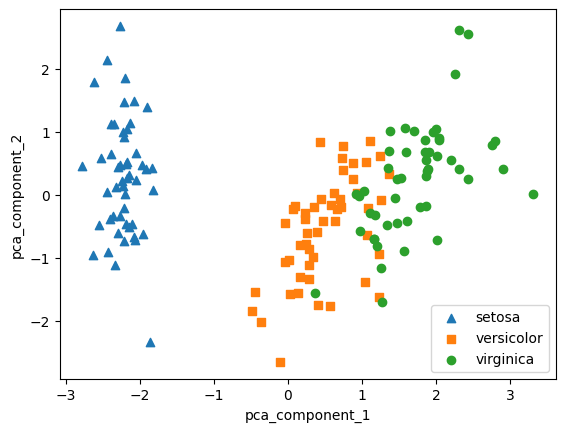

In [6]:
#setosa는 세모 versicolor는 네모 virginica는 동그라미로 표시
markers=['^','s','o']

#pca_component_1을 x축,pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

=> 변환한 후에도 pca_component_1 축을 기반으로 setosa 품종은 명확하게 구분이 가능하다. 

=> versicolor와 virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분됨 

* PCA component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인 

  explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공하고 있다.

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


=> 첫번째 PCA 반환 요소인 pca_component_1가 전체 변동성의 72.9%를 차지하며, pca_component_2가 약 22.8%를 차지한다. 따라서 PCA를 2개 요소로만 변환해도 원본데이터의 변동성을 95% 설명할수 있다.

* 원본 붓꽃 데이터와 PCA로 변환된 데이터에 각각 분류를 적용하기
* 먼저, 원본 붓꽃 데이터에 랜덤 포레스트 적용

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))   

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


  * PCA 데이터에 랜덤포레스트 적용

In [10]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


=> PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다. 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 워본 데이터 대비10% 하락한다.

**<신용카드 고객 데이터 세트>**

In [14]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/esaa/자료/default_of_credit_card_clients_Data/credit_card.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


* 칼럼명 변환, target 속성 별도 저장

In [15]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default',axis=1)

* 각 속성 간의 상관도 구하고 시각화

<Axes: >

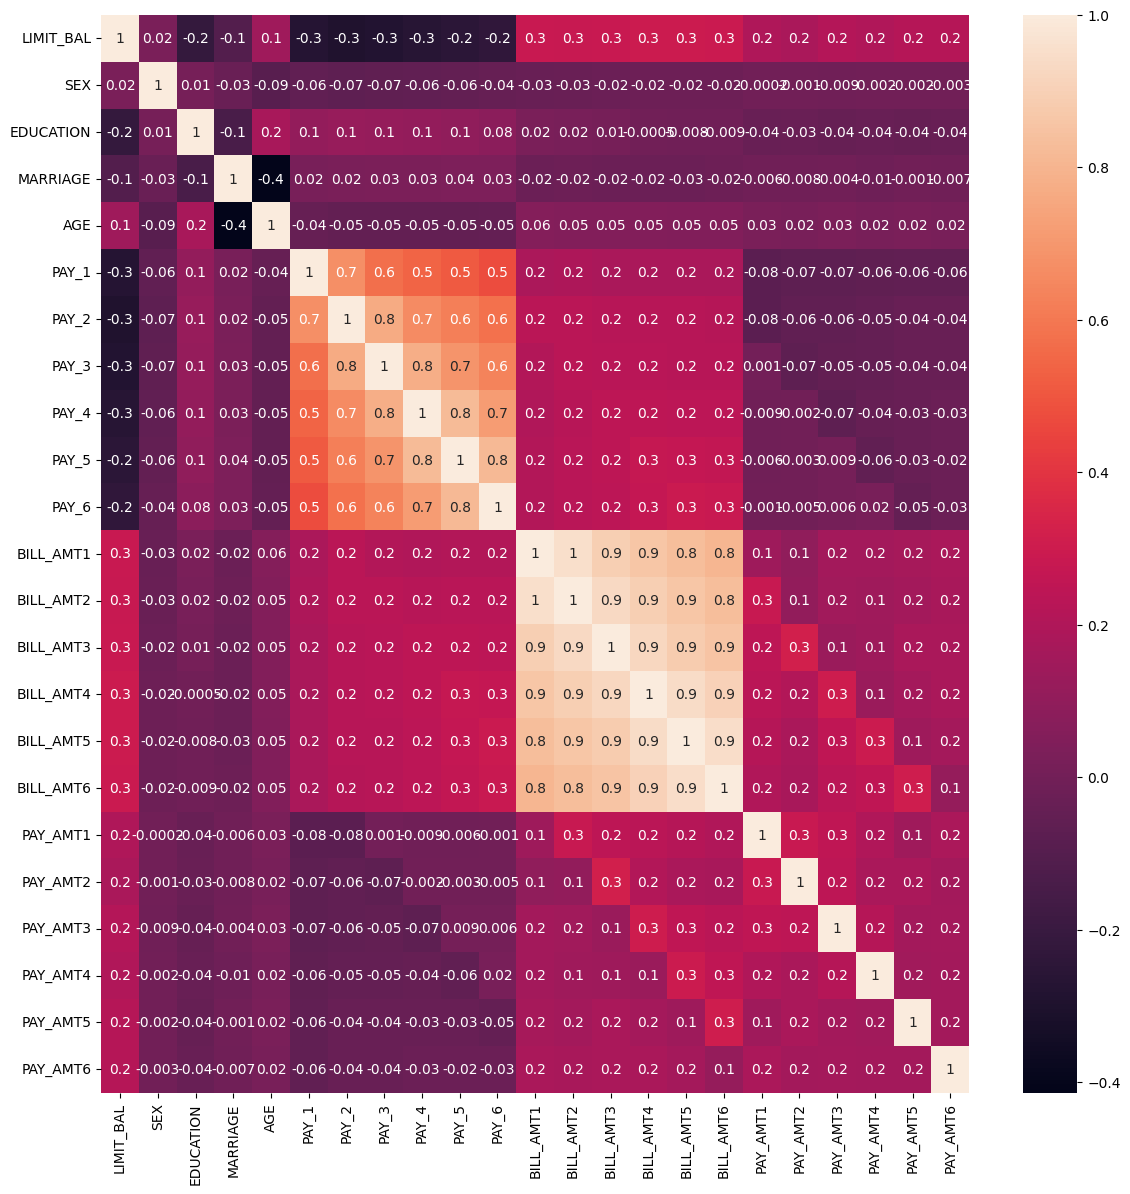

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

=> BILL_ATM1~BILL_ATM^ 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음을 알 수 있다. 

=> 또한,PAY_1~PAY6까지의 속성 역시 상관도가 높다. 

* BILL_ATM1~BILL_ATM6까지 6개 속성을 2개의 컴포넌트로 PCA 변환

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1~BILL_AMT6까지의 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

#2개의 PCA 속성을 가진 PCA 객체를 생성하고,explained_variance_ratio_계산을 위해fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


=> 단 2개의 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며,특히 첫번째 PCA 축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높다.

* 원본 데이터와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과 비교 
* 먼저, 원본 데이터 세트에 랜덤 포레스트 이용

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300,random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 개별 Fold세트 별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트 별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


=> 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81%를 나타낸다. 

* 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해 동일하게 분류 예측 적용

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#원본 데이터 세트에 먼저 StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA변환을 수행하고 cross_val_score()로 분류 예측 수행
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7912 0.7958 0.8019]
PCA 변환 데이터 세트 평균 정확도:0.7963


=> 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생했다. 

=> 이렇게,PCA의 뛰어난 압축 능력을 볼 수 있음

## 03. LDA

### 1) LDA 개요 

LDA는 선형 판별 분석법으로 불리며, PCA와 매우 유사하다. 

(1) LDA와 PCA 차이
* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다. 
* PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

(2) LDA의 차원 축소 방식
* LDA는 특정 공간 상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 배누 분산의 비율을 최대화하는 방식으로 차원을 축소한다. 
* 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

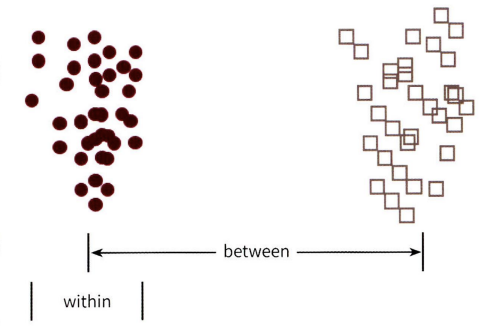

(3) LDA를 구하는 단계 

 1. 클래스 내부와 클래스간 분산 행렬을 구한다. 
 2. 이 두개의 행렬은 입력 데이터의 결정 값 클래스 별로 개별 피처의 평균 벡터를 기반으로 구한다. 
 3. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sb라고 하면 다음 식으로 두 행렬을 고유 벡터로 분해할 수 있다.

 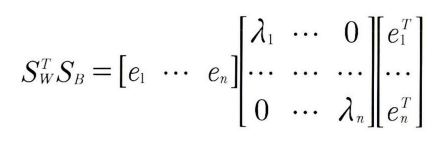

 4. 고유값이 가장 큰순으로 K개만큼 추출한다.
 5. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.  

**<붓꽃 데이터 세트에 LDA 적용하기>**

* 데이터 불러오기

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

* 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환하기 
  
  PCA와 다르게 LDA에서 한가지 유의해야할 점은 LDA는 실제로는 PCA와 다르게 비지도 학습이 아닌, 지도학습이라는 것.

  즉 클래스의 결정 값이 변환시에 필요하다.

In [23]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


* 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현하기

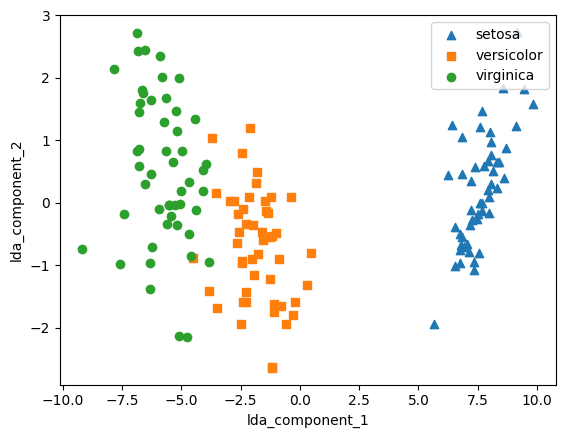

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모,versicolor은 네모, virginica는 동그라미
markers=['^','s','o']

#setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()